This notebook is for generating P1 summary data for area strains
*Updated for new AF cases* after RR extra info on demographics

Using vtk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats

from hrs_23_figures import *

from sklearn import metrics

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

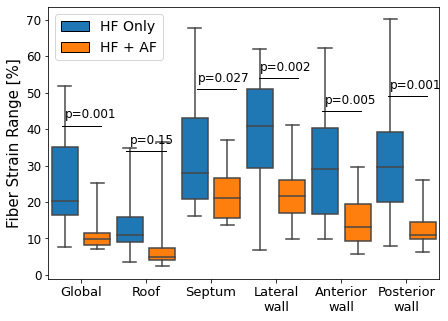

In [2]:
## area strain range boxplots across all 5 regions and globally

## Retrieve data in array
## N_cases, N_regions, N_fcomponents, N_time
nonAF_strains = np.zeros((17,6, 10))
AF_strains = np.zeros((12,6, 10))

regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

for i in range(0,len(regions)):     # region
    for j in range(0,nonAF_strains.shape[0]):    # case
        nonAF_strains[j,i, :] = retrieve_area_strain_transient(nonaf_cases[j], strain_type='area', region=regions[i])

for i in range(0,len(regions)):     # region
    for j in range(0,AF_strains.shape[0]):    # case
        AF_strains[j,i, :] = retrieve_area_strain_transient(af_cases[j], strain_type='area', region=regions[i]) 

## Get strain ranges
nonAF_ranges = np.ptp(nonAF_strains, axis=2)
AF_ranges = np.ptp(AF_strains, axis=2)

## Plotting

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,5), facecolor='white', sharey=True)

data_to_plot= [nonAF_ranges[:,0], AF_ranges[:,0],
               nonAF_ranges[:,1], AF_ranges[:,1],
               nonAF_ranges[:,2], AF_ranges[:,2],
               nonAF_ranges[:,3], AF_ranges[:,3],
               nonAF_ranges[:,4], AF_ranges[:,4],
               nonAF_ranges[:,5], AF_ranges[:,5]]

sns.boxplot(data=data_to_plot, orient='v', ax=ax1, whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

# ax1.set_ylabel(f"f{component+1} Fibre strain range [%]", fontsize=20)
ax1.set_ylabel(f"Fiber Strain Range [%]", fontsize=15)
ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
ax1.set_xticklabels(regions_axis, fontsize=13)
# plt.ylim(0.0, 60)

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:orange')
    
## Calculate p values and plot
p_vals = np.zeros((6,))

for i in range(0, 6):
    ## indexing as follows: p_vals; region; f1 component
    p_vals[i]=stats.ttest_ind(nonAF_ranges, AF_ranges)[-1][i]

## Plotting p_values
plt.text(0.0, 43, f'p={str(np.round(p_vals[0],3))}', size=12)
plt.text(2, 36, f'p={str(np.round(p_vals[1],3))}', size=12)
plt.text(4.1, 53, f'p={str(np.round(p_vals[2],3))}', size=12)
plt.text(6, 56, f'p={str(np.round(p_vals[3],3))}', size=12)
plt.text(8, 47, f'p={str(np.round(p_vals[4],3))}', size=12)
plt.text(10, 51, f'p={str(np.round(p_vals[5],3))}', size=12)

## horizontal lines
low_1=0.035
len_line=0.1
plt.axhline(41, low_1,low_1+len_line, c='black', lw=1)

low_2=0.2
low_3=0.38
low_4=0.54
low_5=0.7
low_6=0.87

plt.axhline(34, low_2,low_2+len_line, c='black', lw=1)
plt.axhline(51, low_3,low_3+len_line, c='black', lw=1)
plt.axhline(54, low_4,low_4+len_line, c='black', lw=1)
plt.axhline(45, low_5,low_5+len_line, c='black', lw=1)
plt.axhline(49, low_6,low_6+len_line, c='black', lw=1)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

plt.yticks(fontsize=12)

# sns.set_style("whitegrid")

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/boxplots_1_1_nolines_nopval.png", dpi=200, bbox_inches="tight")

In [13]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [17]:
## Regional stats
for i in range(0, 6):
    region=i
    print(f"Region: {regions[i]}")
    
    print("AF:\t", np.mean(AF_ranges[:,region]), "pm", 
         np.std(AF_ranges[:,region]))
    print("nAF:\t", np.mean(nonAF_ranges[:,region]), "pm", 
         np.std(nonAF_ranges[:,region]))

Region: global
AF:	 11.177202200661599 pm 4.804535500501251
nAF:	 25.32664761793374 pm 12.610853058769148
Region: roof
AF:	 8.591235386091173 pm 9.031575528205234
nAF:	 13.33712081587602 pm 7.543704205071629
Region: sept
AF:	 22.471033000899524 pm 7.566907689279665
nAF:	 33.88652617839038 pm 14.979374318935328
Region: lat
AF:	 22.957811765228115 pm 8.767004257644253
nAF:	 39.830264170772814 pm 14.213432253467305
Region: ant
AF:	 14.737995043013877 pm 6.509719842862507
nAF:	 29.824674690172422 pm 15.464618019171489
Region: post
AF:	 12.75414096799713 pm 5.032056996782221
nAF:	 32.60778491586859 pm 17.425170781047445


In [5]:

## Set up predicts (probs) and ground truth labels for AF
## N_cases, N_region, N_components

y_true = np.zeros((29, 6))
y_true[:17, ...] = 1.0

y_probs = np.zeros((29, 6))
y_probs[:17, ...] = nonAF_ranges[...]
y_probs[17:, ...] = AF_ranges[...]

fpr, tpr, thresholds = metrics.roc_curve(y_true[:, 0], y_probs[:, 0])
auc = metrics.roc_auc_score(y_true[:, 0], y_probs[:, 0])

auc

0.8676470588235294

Text(0.6, 0.5, 'AUC = 0.868')

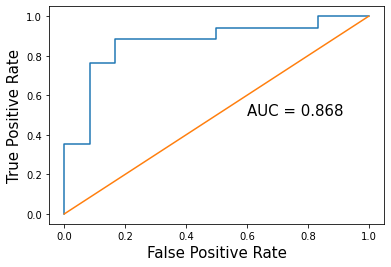

In [6]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))

plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)

plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)

In [8]:
for i in range(0, len(regions)):
    auc = metrics.roc_auc_score(y_true[:, i], y_probs[:, i])
    
    print(f"{regions[i]} AUC: ", auc)

global AUC:  0.8676470588235294
roof AUC:  0.7598039215686274
sept AUC:  0.7401960784313726
lat AUC:  0.857843137254902
ant AUC:  0.7941176470588236
post AUC:  0.8774509803921569


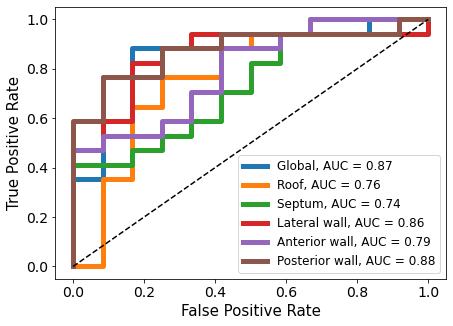

In [9]:
## Plotting all 6 lines on same plot

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,5), facecolor='white', sharey=True)

regions_axis=['Global', 'Roof', 'Septum', 'Lateral wall', 'Anterior wall', 'Posterior wall']

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_probs[:, i])
    auc = metrics.roc_auc_score(y_true[:, i], y_probs[:, i])
    
    plt.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='5')
    
#     print(len(fpr))
#     print(len(tpr))

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=12)

# plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/roc_analysis_1_1.png", dpi=200, bbox_inches="tight")

## Ejection fractions

Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


(0.0, 60.0)

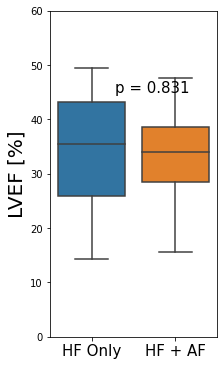

In [10]:
numTimes = 10
nTime=np.arange(0, numTimes)/numTimes

DataPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
# DataPath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
## 07 and 10 failed with haonet

nAF_LV_EF = np.zeros((len(nonaf_cases),))
AF_LV_EF = np.zeros((len(af_cases),))

## append data

# basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LV_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LV_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LV_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LV_EF.txt")

### Doing the plotting

fig, (ax1) = plt.subplots(1,1,figsize=(3,6), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF], orient='v')
plt.ylabel("LVEF [%]", fontsize=20)
plt.xticks(np.arange(2), ['HF Only', 'HF + AF'], fontsize=15)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
plt.text(0.28, 45, f'p = {str(np.round(pval,3))}', size=15)

plt.ylim(0,60.0)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/lv_ef_1_notxt.png",dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')    

Ttest_indResult(statistic=4.5312584083396965, pvalue=0.00010730573190481908)


Text(0.28, 80, 'p = 0.0')

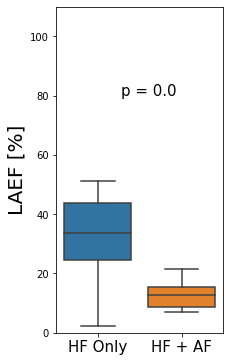

In [11]:
nAF_LA_EF = np.zeros((len(nonaf_cases),))
AF_LA_EF = np.zeros((len(af_cases),))

basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LA_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LA_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LA_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LA_EF.txt")
    

## Plotting

fig, (ax1) = plt.subplots(1,1,figsize=(3,6), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LA_EF, AF_LA_EF], orient='v')
plt.ylabel("LAEF [%]", fontsize=20)
plt.xticks(np.arange(2), ['HF Only', 'HF + AF'], fontsize=15)
plt.ylim(0,110)

print(stats.ttest_ind(nAF_LA_EF, AF_LA_EF))
pval = stats.ttest_ind(nAF_LA_EF, AF_LA_EF)[-1]
plt.text(0.28, 80, f'p = {str(np.round(pval,3))}', size=15)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/la_ef_1.png",dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')

Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


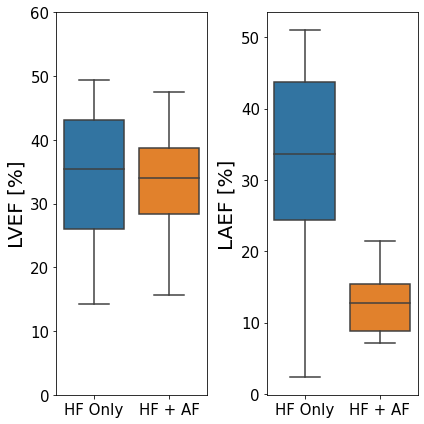

In [12]:
numTimes = 10
nTime=np.arange(0, numTimes)/numTimes

DataPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
# DataPath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"

nAF_LV_EF = np.zeros((len(nonaf_cases),))
AF_LV_EF = np.zeros((len(af_cases),))

## append data

# basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LV_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LV_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LV_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LV_EF.txt")

### Doing the plotting

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,6), facecolor='white')

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF], orient='v', ax=ax1)
ax1.set_ylabel("LVEF [%]", fontsize=20)
ax1.set_xticks(np.arange(2), ['HF Only', 'HF + AF'], fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
# plt.text(0.28, 45, f'p = {str(np.round(pval,3))}', size=15)

ax1.set_ylim(0,60.0)

sns.boxplot(data=[nAF_LA_EF, AF_LA_EF], orient='v', ax=ax2)
ax2.set_ylabel("LAEF [%]", fontsize=20)
ax2.set_xticks(np.arange(2), ['HF Only', 'HF + AF'], fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
# plt.ylim(0,110)

# print(stats.ttest_ind(nAF_LA_EF, AF_LA_EF))
# pval = stats.ttest_ind(nAF_LA_EF, AF_LA_EF)[-1]
# plt.text(0.28, 80, f'p = {str(np.round(pval,3))}', size=15)

plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/ef_combines.png",dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')    